In [7]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:
import pandas as pd
import os
os.getcwd() # Ver donde estamos ubicados



'C:\\Users\\gianf\\OneDrive\\Documentos\\GitHub\\E337--8\\Big_Data_TP1_Grupo8'

In [11]:
os.chdir("C:\\Users\\gianf\\OneDrive\\Documentos\\GitHub\\E337--8\\Big_Data_TP1_Grupo8") # Ubicarnos en la carpeta con todos los archivos de esta tutoria

In [13]:
df = pd.read_excel('Tabla_acortada1.xlsx')

In [14]:
# Verificar los nombres de las columnas
print("Columnas del DataFrame:", df.columns)

Columnas del DataFrame: Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR', 'PONDIH',
       'PJ1_1', 'PJ2_1', 'PJ3_1', 'IDIMPP'],
      dtype='object', length=181)


In [15]:
#2d
diccionario_reemplazo = {  
    "CH04": {  
        1: "Hombre",  
        2: "Mujer",  
        "Varón": "Hombre"  # Unificar nombres  
    },  
    "TRIMESTRE": {  
        1: "1er. Trimestre",  
        "1er. Trimestre": "Primer Trimestre"  # Unificar formato  
    },  
    "REGION": {  
        43: "Pampeana"  # Solo tiene este valor  
    },  
    "ESTADO": {  
        1: "Ocupado",  
        2: "Desocupado",  
        3: "Inactivo",  
        4: "Menor de 10 años"  
    }  
}
df.replace(diccionario_reemplazo, inplace=True)


In [16]:
df["ESTADO"].unique()

array(['Ocupado', 'Inactivo', 'Menor de 10 años', 'Desocupado', 0],
      dtype=object)

In [17]:
# Identificar las observaciones donde no se respondió la condición de actividad (ESTADO=0)
norespondieron = df[df['ESTADO'] == 0]

In [18]:
# Guardar las observaciones que no respondieron en una nueva base
norespondieron.to_excel('norespondieron.xlsx', index=False)


In [19]:
# Guardar las observaciones que respondieron en una nueva base
respondieron = df[df['ESTADO'] != 0]
respondieron.to_excel('respondieron.xlsx', index=False)


In [20]:
# Contar el número de personas que no respondieron cuál es su condición de actividad
num_norespondieron = len(norespondieron)
print(f'Número de personas que no respondieron cuál es su condición de actividad: {num_norespondieron}')

Número de personas que no respondieron cuál es su condición de actividad: 2


In [21]:
import os

In [24]:
# Agregar la columna "PEA"
# Consideramos PEA (Población Económicamente Activa) a aquellos con ESTADO 1 (ocupados) o 2 (desocupados)
respondieron.loc[:, 'PEA'] = respondieron['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)


C:\Users\gianf\AppData\Local\Temp\ipykernel_10008\3662768976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[:, 'PEA'] = respondieron['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)


In [43]:
# Guardar la base respondieron con la nueva columna "PEA"
respondieron.to_excel('respondieron.xlsx', index=False)


In [44]:
# Verificar los datos en la base respondieron
print("Datos en la base respondieron:\n", respondieron.head())

Datos en la base respondieron:
                           CODUSU  ANO4       TRIMESTRE  NRO_HOGAR COMPONENTE  \
0  TQRMNOSYUHKNKMCDEIGED00856897  2024  1er. Trimestre          1          1   
1  TQRMNOSYUHKNKMCDEIGED00856897  2024  1er. Trimestre          1          2   
2  TQRMNORTVHLOKQCDEIMBF00855868  2024  1er. Trimestre          1          1   
3  TQRMNORTVHLOKQCDEIMBF00855868  2024  1er. Trimestre          1          2   
4  TQRMNORSXHMLLOCDEIMBF00802814  2024  1er. Trimestre          1          1   

  H15    REGION MAS_500 AGLOMERADO  PONDERA  ... RDECCFR GDECCFR PDECCFR  \
0   1  Pampeana       N         30      159  ...       7     NaN     8.0   
1   1  Pampeana       N         30      159  ...       7     NaN     8.0   
2   1  Pampeana       N         36      138  ...       3     NaN     4.0   
3   1  Pampeana       N         36      138  ...       3     NaN     4.0   
4   1  Pampeana       N         36      149  ...      10     NaN    10.0   

  ADECCFR PONDIH PJ1_1 PJ2_1 P

In [47]:
# Filtrar las observaciones por los años 2004 y 2024
respondieron_filtered = respondieron[respondieron['ANO4'].isin([2004, 2024])]


In [49]:
# Agrupar los datos por año y PEA
pea_grouped = respondieron_filtered.groupby(['ANO4', 'PEA']).size().unstack().fillna(0)


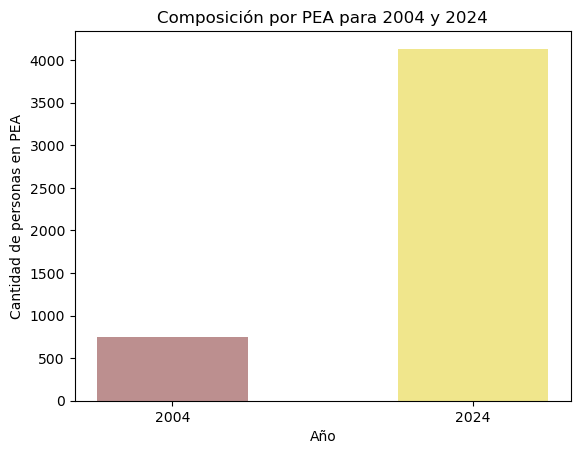

In [53]:


# Sumar las personas en la PEA para cada año
pea_totals = pea_grouped.sum(axis=1)

# Crear el gráfico de barras para PEA
fig, ax = plt.subplots()

# Configurar las posiciones de las barras
bar_positions = [0, 1]  # Posiciones de las barras para 2004 y 2024

# Graficar las barras
ax.bar(bar_positions, pea_totals, width=0.5, color=['rosybrown', 'khaki'])

# Personalizar el gráfico
ax.set_title('Composición por PEA para 2004 y 2024')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de personas en PEA')
ax.set_xticks(bar_positions)
ax.set_xticklabels(['2004', '2024'])

# Mostrar el gráfico en Jupyter Notebook
plt.show()

# Guardar el gráfico como imagen
fig.savefig('composicion_pea_2004_2024.png')


In [66]:
#8 # Agregar la columna "PET"
# Consideramos PET (Población en Edad para Trabajar) a aquellos con edad entre 15 y 65 años
respondieron['PET'] = respondieron['CH06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

TypeError: '<=' not supported between instances of 'int' and 'str'

In [ ]:
# Agrupar los datos por año y PET
pet_grouped = respondieron_filtered.groupby(['ANO4', 'PET']).size().unstack().fillna(0)

# Crear el gráfico de barras para PET
fig, ax = plt.subplots()

# Configurar las posiciones de las barras
bar_width = 0.35
bar_positions_2004 = [0, 1]
bar_positions_2024 = [2, 3]

# Graficar las barras
ax.bar(bar_positions_2004, pet_grouped.loc[2004], width=bar_width, label='2004', color='blue')
ax.bar(bar_positions_2024, pet_grouped.loc[2024], width=bar_width, label='2024', color='orange')

# Personalizar el gráfico
ax.set_title('Composición por PET para 2004 y 2024')
ax.set_xlabel('Años y PET')
ax.set_ylabel('Cantidad')
ax.set_xticks([0.5, 2.5])
ax.set_xticklabels(['2004', '2024'])
ax.legend(title='Año')

# Mostrar el gráfico en Jupyter Notebook
plt.show()

In [55]:
#Punto 9 (asumo que ya tiene gian cargada la base)



#A
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
# Agrupar por año y nivel educativo para calcular la proporción de desocupados
desocupados_educacion = respondieron.groupby(["ANO4", "NIVEL_ED"])["Desocupado"].mean().reset_index()

KeyError: 'Column not found: Desocupado'

In [ ]:
# Graficar comparación
plt.figure(figsize=(10, 6))
sns.barplot(data=desocupados_educacion, x="NIVEL_ED", y="desocupado", hue="ANO4", palette="viridis")

plt.xlabel("Nivel Educativo")
plt.ylabel("Proporción de Desocupados")
plt.title("Desocupación por Nivel Educativo en 2004 vs 2024")
plt.legend(title="Año")

plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
plt.show()

In [ ]:
#b
# Crear categorías de edad en grupos de 10 años
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100]  # Definir los rangos de edad
labels = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"]
respondieron["edad_grupo"] = pd.cut(respondieron["CH06"], bins=bins, labels=labels, right=False)

In [ ]:
# Calcular proporción de desocupados por edad agrupada
desocupados_edad = respondieron.groupby(["ANO4", "edad_grupo"])["desocupado"].mean().reset_index()

In [ ]:
# Graficar comparación
plt.figure(figsize=(10, 6))
sns.barplot(data=desocupados_edad, x="edad_grupo", y="desocupado", hue="ANO4", palette="magma")

plt.xlabel("Grupo de Edad")
plt.ylabel("Proporción de Desocupados")
plt.title("Desocupación por Grupo de Edad en 2004 vs 2024")
plt.legend(title="Año")

plt.show()

In [ ]:
#c
# Calcular proporción de desocupados por sexo
desocupados_sexo = respondieron.groupby(["ANO4", "CH04"])["desocupado"].mean().reset_index()

# Graficar comparación
plt.figure(figsize=(8, 5))
sns.barplot(data=desocupados_sexo, x="CH04", y="desocupado", hue="ANO4", palette="coolwarm")

plt.xlabel("Sexo")
plt.ylabel("Proporción de Desocupados")
plt.title("Desocupación por Sexo en 2004 vs 2024")
plt.legend(title="Año")

plt.show()